## Ejemplo 1

In [1]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

In [2]:
#########
# El vecino más cercano calcula la distancia entre todos los puntos, y define una anomalía según:
# 1.- Los primeros p puntos cuya distancia al kth vecino más cercano es mayor. 
# 2.- Los primeros p puntos cuya distancia promedio a los k vecinos más cercanos es mayor.
# 3.- Aquellos puntos que tienen menos de p vecinos dentro de una distancia d.
#########

In [3]:
data = pd.read_csv("tasaFertilidad2019vsGPD.csv")

x = np.array(data["IngresoPerCapita"])
y = np.array(data["TasaFertilidad"])

In [4]:
# data.head()
data.shape

(189, 5)

In [5]:
#matriz de distancias
mat_dist = np.ones([len(x),len(x)])
#print(mat_dist)
for i in range(len(x)):
    for j in range(len(y)):
        dist = mt.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
        mat_dist[i,j] = round(dist,2)        

In [6]:
mat_dist

array([[    0., 10500., 13200., ...,   700.,  2000.,   300.],
       [10500.,     0.,  2700., ..., 11200.,  8500., 10200.],
       [13200.,  2700.,     0., ..., 13900., 11200., 12900.],
       ...,
       [  700., 11200., 13900., ...,     0.,  2700.,  1000.],
       [ 2000.,  8500., 11200., ...,  2700.,     0.,  1700.],
       [  300., 10200., 12900., ...,  1000.,  1700.,     0.]])

In [36]:
print(mat_dist)
mat_dist = pd.DataFrame(mat_dist)


         0        1        2         3        4        5        6        7    \
0        0.0  10500.0  13200.0   4800.00  24300.0  18900.0   7500.0  23300.0   
1    10500.0      0.0   2700.0   5700.00  13800.0   8400.0   3000.0  12800.0   
2    13200.0   2700.0      0.0   8400.00  11100.0   5700.0   5700.0  10100.0   
3     4800.0   5700.0   8400.0      0.00  19500.0  14100.0   2700.0  18500.0   
4    24300.0  13800.0  11100.0  19500.00      0.0   5400.0  16800.0   1000.0   
..       ...      ...      ...       ...      ...      ...      ...      ...   
184   4900.0   5600.0   8300.0    100.07  19400.0  14000.0   2600.0  18400.0   
185    500.0  10000.0  12700.0   4300.00  23800.0  18400.0   7000.0  22800.0   
186    700.0  11200.0  13900.0   5500.00  25000.0  19600.0   8200.0  24000.0   
187   2000.0   8500.0  11200.0   2800.00  22300.0  16900.0   5500.0  21300.0   
188    300.0  10200.0  12900.0   4500.00  24000.0  18600.0   7200.0  23000.0   

         8        9    ...      179    

In [50]:
mat_dist

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,0.0,10500.0,13200.0,4800.00,24300.0,18900.0,7500.0,23300.0,48300.0,47900.0,...,57500.0,20400.0,4900.00,700.0,10100.0,4900.00,500.0,700.0,2000.0,300.0
1,10500.0,0.0,2700.0,5700.00,13800.0,8400.0,3000.0,12800.0,37800.0,37400.0,...,47000.0,9900.0,5600.00,9800.0,400.0,5600.00,10000.0,11200.0,8500.0,10200.0
2,13200.0,2700.0,0.0,8400.00,11100.0,5700.0,5700.0,10100.0,35100.0,34700.0,...,44300.0,7200.0,8300.00,12500.0,3100.0,8300.00,12700.0,13900.0,11200.0,12900.0
3,4800.0,5700.0,8400.0,0.00,19500.0,14100.0,2700.0,18500.0,43500.0,43100.0,...,52700.0,15600.0,100.06,4100.0,5300.0,100.07,4300.0,5500.0,2800.0,4500.0
4,24300.0,13800.0,11100.0,19500.00,0.0,5400.0,16800.0,1000.0,24000.0,23600.0,...,33200.0,3900.0,19400.00,23600.0,14200.0,19400.00,23800.0,25000.0,22300.0,24000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,4900.0,5600.0,8300.0,100.07,19400.0,14000.0,2600.0,18400.0,43400.0,43000.0,...,52600.0,15500.0,0.30,4200.0,5200.0,0.00,4400.0,5600.0,2900.0,4600.0
185,500.0,10000.0,12700.0,4300.00,23800.0,18400.0,7000.0,22800.0,47800.0,47400.0,...,57000.0,19900.0,4400.00,200.0,9600.0,4400.00,0.0,1200.0,1500.0,200.0
186,700.0,11200.0,13900.0,5500.00,25000.0,19600.0,8200.0,24000.0,49000.0,48600.0,...,58200.0,21100.0,5600.00,1400.0,10800.0,5600.00,1200.0,0.0,2700.0,1000.0
187,2000.0,8500.0,11200.0,2800.00,22300.0,16900.0,5500.0,21300.0,46300.0,45900.0,...,55500.0,18400.0,2900.00,1300.0,8100.0,2900.00,1500.0,2700.0,0.0,1700.0


In [38]:
len(x)

189

In [46]:
#Extracción de los índices de los puntos con mayor distancia al sexto vecino
min6 = pd.DataFrame(np.zeros(len(x),dtype=np.int64))
for i in range(len(x)):
    aux = mat_dist.iloc[i]
    aux = aux.nsmallest(6) #calculo las 6 menores distancias de la fila
    print(aux)
    min6.at[i,0] = aux.index[-1] #guardo los índices, en donde el valor es el y, el índice de este arreglo es el valor x
    print(aux.index[-1])

0        0.00
67       0.33
88       0.83
26     100.00
140    100.00
53     200.00
Name: 0, dtype: float64
53
1       0.00
85      1.56
76    100.00
21    200.00
39    200.00
48    200.01
Name: 1, dtype: float64
48
2        0.0
40     200.0
147    200.0
64     300.0
100    300.0
23     400.0
Name: 2, dtype: float64
23
3        0.00
181    100.06
184    100.07
137    200.00
75     400.01
91     600.01
Name: 3, dtype: float64
91
4         0.00
86        0.54
173     600.00
128     900.00
7      1000.00
92     1300.00
Name: 4, dtype: float64
92
5         0.0
77      700.0
108     700.0
25      800.0
109    1000.0
93     1500.0
Name: 5, dtype: float64
93
6        0.0
54     300.0
83     300.0
130    300.0
96     500.0
49     600.0
Name: 6, dtype: float64
49
7         0.0
128     100.0
33      800.0
138     800.0
38      900.0
4      1000.0
Name: 7, dtype: float64
4
8         0.00
164       0.61
61      100.00
9       400.00
43      400.00
161    1200.00
Name: 8, dtype: float64
161
9      

In [54]:
#print (min6)
#print(min6.sort_values(by=[0],ascending=True))
min6[136::]

,0
136,79
137,123
138,4
139,103
140,153
141,40
142,39
143,123
144,163
145,8


In [12]:
#debo calcular los mayores valores de este arreglo y los datos que generan esos valores podrían ser outliers
dist_aux = pd.DataFrame(np.zeros(len(x),dtype=np.int64))
# dist_aux

In [47]:
#creo un dataframe con las distancias y con el índice del punto x[n],y[n]
for i in range(len(x)):
    dist_aux.at[i,0] = mat_dist.loc[i,min6.loc[i,0]]
    dist_aux.at[i,'p1'] = int(i)
dist_aux

,0,p1
0,200,0.0
1,200,1.0
2,400,2.0
3,600,3.0
4,1300,4.0
...,...,...
184,500,184.0
185,200,185.0
186,200,186.0
187,300,187.0


In [14]:
valor = dist_aux.nlargest(15,0) #obtengo las 15 distancias mayores para observar los potenciales outliers
print(valor)

         0     p1
136  49000  136.0
99   36100   99.0
98   30800   98.0
150  22100  150.0
24   15700   24.0
79   14100   79.0
125  10400  125.0
177   7800  177.0
89    6700   89.0
179   6700  179.0
72    6600   72.0
162   6600  162.0
145   4500  145.0
118   3300  118.0
106   2600  106.0


## Ejemplo 2

In [15]:
#https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [16]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
# input data
df = data[["sepal_length", "sepal_width"]]

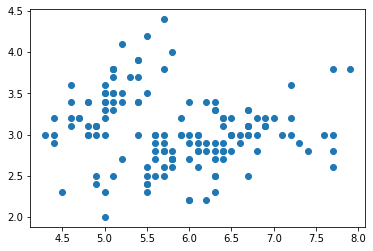

In [17]:
# scatterplot of inputs data
plt.scatter(df["sepal_length"], df["sepal_width"])
plt.show()

In [18]:
# create arrays
X = df.values

In [19]:
X.shape

(150, 2)

### Documentacion
* NearestNeighbors: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html?highlight=nearestneighbors#sklearn.neighbors.NearestNeighbors
* DistanceMetric: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

In [20]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 5)
# fit model
nbrs.fit(X)

NearestNeighbors()

In [21]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)

In [22]:
distances=pd.DataFrame(distances)
distances

,0,1,2,3,4
0,0.0,0.0,0.100000,0.100000,0.100000
1,0.0,0.1,0.100000,0.100000,0.100000
2,0.0,0.0,0.100000,0.141421,0.141421
3,0.0,0.1,0.141421,0.141421,0.200000
4,0.0,0.1,0.100000,0.141421,0.141421
...,...,...,...,...,...
145,0.0,0.0,0.100000,0.100000,0.100000
146,0.0,0.0,0.200000,0.200000,0.223607
147,0.0,0.0,0.000000,0.100000,0.141421
148,0.0,0.1,0.141421,0.141421,0.200000


In [29]:
indexes=pd.DataFrame(indexes)
indexes

,0,1,2,3,4
0,17,0,40,43,39
1,1,25,9,37,34
2,2,29,47,30,3
3,3,47,29,2,30
4,4,40,43,17,0
...,...,...,...,...,...
145,77,145,112,86,65
146,146,72,87,123,134
147,104,147,116,75,137
148,148,136,100,56,85


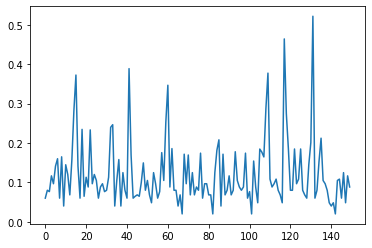

In [30]:
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))
plt.show()

In [31]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.15)
print(outlier_index)

(array([  6,   8,  13,  14,  15,  18,  22,  32,  33,  36,  41,  42,  57,
        59,  60,  62,  68,  70,  76,  84,  85,  87,  93,  98, 102, 105,
       106, 107, 108, 109, 117, 118, 119, 122, 125, 130, 131, 134, 135],
      dtype=int64),)


In [32]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
print(outlier_values)

     sepal_length  sepal_width
6             4.6          3.4
8             4.4          2.9
13            4.3          3.0
14            5.8          4.0
15            5.7          4.4
18            5.7          3.8
22            4.6          3.6
32            5.2          4.1
33            5.5          4.2
36            5.5          3.5
41            4.5          2.3
42            4.4          3.2
57            4.9          2.4
59            5.2          2.7
60            5.0          2.0
62            6.0          2.2
68            6.2          2.2
70            5.9          3.2
76            6.8          2.8
84            5.4          3.0
85            6.0          3.4
87            6.3          2.3
93            5.0          2.3
98            5.1          2.5
102           7.1          3.0
105           7.6          3.0
106           4.9          2.5
107           7.3          2.9
108           6.7          2.5
109           7.2          3.6
117           7.7          3.8
118     

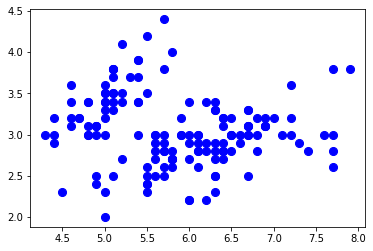

In [33]:
# plot data
plt.scatter(df["sepal_length"], df["sepal_width"], color = "b", s = 65)

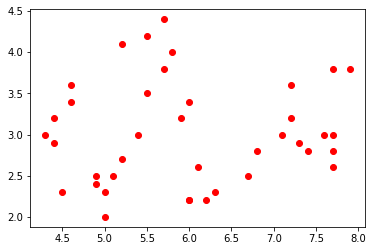

In [34]:
# plot outlier values
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], color = "r")
plt.show()